In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import re

#### Import the data and get a high-level picture

In [2]:
df = pd.read_csv(r"C:\Users\trant\OneDrive\Documents\MIT_DA_Tri1_2024\7130ICT Data Analytics\Lab 1\sales(1).csv")
df.head()

,order_id,name,ordered_at,price,quantity,line_total
0,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,$3.50,3,$10.50
1,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,$3.50,1,$3.50
2,10001,"""SORBET"" Raspberry",2018-01-01 12:14:54,$2.50,2,$5.00
3,10001,NaN,2018-01-01 12:14:54,$1.50,1,$1.50
4,10001,"""CONE"" Dipped Waffle Cone",2018-01-01 12:14:54,$3.50,1,$3.50


In [3]:
df.shape

(29922, 6)

In [4]:
df.dtypes

order_id       int64
name          object
ordered_at    object
price         object
quantity       int64
line_total    object
dtype: object

#### TODO: Fix column datatypes

Change ordered_at to datetime

Change price and line_total to float

In [5]:
df['ordered_at'] = pd.to_datetime(df['ordered_at'])

In [6]:
df['price'] = df['price'].str.replace('$','').astype(float)
df['line_total'] = df['line_total'].str.replace('$','').astype(float)

In [7]:
df.dtypes

order_id               int64
name                  object
ordered_at    datetime64[ns]
price                float64
quantity               int64
line_total           float64
dtype: object

#### TODO: drop if duplicated or null

In [8]:
df[df.duplicated()]

,order_id,name,ordered_at,price,quantity,line_total
139,10049,"""CONE"" Dipped Waffle Cone",2018-01-02 13:47:55,3.5,1,3.5
178,10063,"""ICE CREAM"" Earl Gray",2018-01-02 21:28:36,0.5,3,1.5
207,10073,"""ICE CREAM"" Mint Chip",2018-01-03 01:45:00,1.5,3,4.5
210,10073,"""ICE CREAM"" Mint Chip",2018-01-03 01:45:00,1.5,3,4.5
273,10091,"""SORBET"" Blood Orange",2018-01-03 09:14:48,2.5,2,5.0
...,...,...,...,...,...,...
29917,18452,"""ICE CREAM"" Dulce De Leche",2018-06-26 03:56:13,-1.5,2,-3.0
29918,12889,"""ICE CREAM"" Dark Chocolate",2018-03-03 10:06:21,4.0,3,12.0
29919,14526,"""ICE CREAM"" Peanut Fudge",2018-04-05 17:33:24,3.5,3,10.5
29920,19589,"""CONE"" Dipped Waffle Cone",2018-07-20 09:10:01,3.5,2,7.0


In [9]:
df = df.drop_duplicates()
df[df.duplicated()].shape[0]

0

In [10]:
df.isnull().sum()

order_id         0
name          1481
ordered_at       0
price            0
quantity         0
line_total       0
dtype: int64

In [11]:
df[df['name'].isnull()].head()

,order_id,name,ordered_at,price,quantity,line_total
3,10001,NaN,2018-01-01 12:14:54,1.5,1,1.5
6,10002,NaN,2018-01-01 12:23:09,3.0,3,9.0
27,10007,NaN,2018-01-01 15:03:17,2.5,1,2.5
77,10026,NaN,2018-01-02 03:25:40,0.5,2,1.0
88,10031,NaN,2018-01-02 05:45:48,3.5,3,10.5


In [12]:
df = df.dropna()
df.isnull().sum()

order_id      0
name          0
ordered_at    0
price         0
quantity      0
line_total    0
dtype: int64

#### Sanity check for value ranges and to check assumptions

In [13]:
df[(df['price'] * df['quantity']) != df['line_total']].shape[0]

28

In [14]:
df[df['line_total'] < 0].shape[0]

279

#### TODO: 
Set line_total = price * quantity if different.

Then remove if line total < 0

In [15]:
# Calculate line_total
df['line_total'] = df['price'] * df['quantity']

# Filter out rows where line_total is less than 0
df = df[df['line_total'] >= 0]

df.head()

,order_id,name,ordered_at,price,quantity,line_total
0,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,3.5,3,10.5
1,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,3.5,1,3.5
2,10001,"""SORBET"" Raspberry",2018-01-01 12:14:54,2.5,2,5.0
4,10001,"""CONE"" Dipped Waffle Cone",2018-01-01 12:14:54,3.5,1,3.5
5,10002,"""SORBET"" Lychee",2018-01-01 12:23:09,3.0,1,3.0


In [20]:
print('Number of incorrect calculation: ',df[(df['price'] * df['quantity']) != df['line_total']].shape[0])
print('Number of total value < 0: ', df[df['line_total'] < 0].shape[0])

Number of incorrect calculation:  0
Number of total value < 0:  0


In [21]:
df.describe()

,order_id,ordered_at,price,quantity,line_total
count,27624.000000,27624,27624.000000,27624.000000,27624.000000
mean,14993.783051,2018-04-15 11:40:51.128764928,2.511711,2.000724,5.028743
min,10000.000000,2018-01-01 11:30:00,0.500000,1.000000,0.500000
25%,12501.750000,2018-02-23 05:11:56.249999872,1.500000,1.000000,2.500000
50%,14973.000000,2018-04-14 15:11:43,2.500000,2.000000,4.500000
75%,17507.000000,2018-06-07 00:48:22,3.500000,3.000000,7.500000
max,19999.000000,2018-07-28 18:51:57,4.000000,3.000000,12.000000
std,2888.516649,NaN,1.059244,0.819432,3.085410


#### TODO: Get value between "" in name and put it in category column

In [16]:
# TODO
df['category'] = df['name'].str.extract(r'"(.*?)"\s+')
df.head()

,order_id,name,ordered_at,price,quantity,line_total,category
0,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,3.5,3,10.5,ICE CREAM
1,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,3.5,1,3.5,ICE CREAM
2,10001,"""SORBET"" Raspberry",2018-01-01 12:14:54,2.5,2,5.0,SORBET
4,10001,"""CONE"" Dipped Waffle Cone",2018-01-01 12:14:54,3.5,1,3.5,CONE
5,10002,"""SORBET"" Lychee",2018-01-01 12:23:09,3.0,1,3.0,SORBET


#### Analysis, finally!

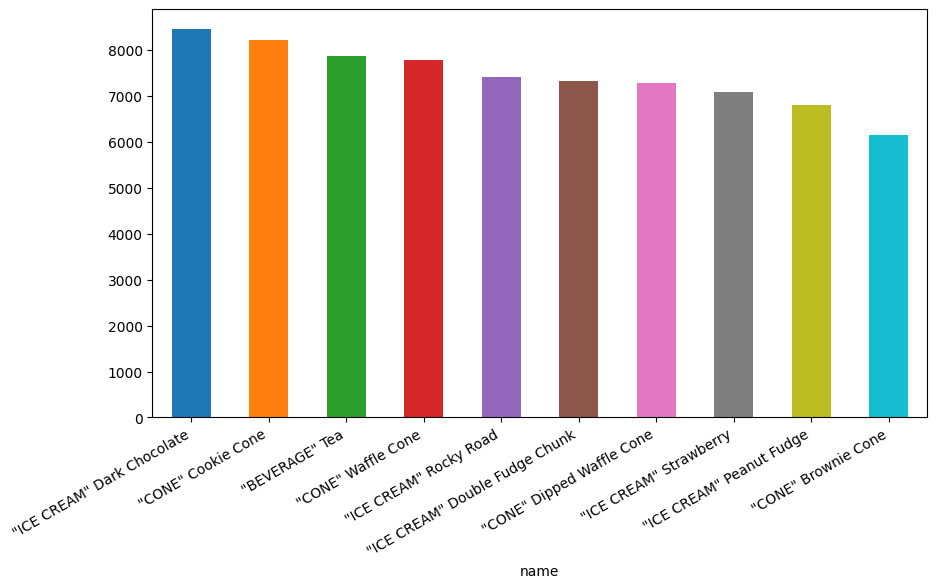

In [20]:
f, ax = plt.subplots(figsize=(10, 6))
colors = plt.cm.tab10(range(len(df['name'])))
df.groupby('name')['line_total'].sum().sort_values(ascending=False).head(10).plot(kind='bar',color=colors)
f.autofmt_xdate()
plt.show()